In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as st 
import numpy as np 
from scipy.stats import sem 

data5 = "our_source_/HPI_AT_BDL_tract.csv"
data_5 = pd.read_csv(data5)


data_5

,tract,state_abbr,year,annual_change,hpi,hpi1990,hpi2000
0,1001020100,AL,1998,NaN,100.00,NaN,100.96
1,1001020100,AL,1999,-5.71,94.29,NaN,95.19
2,1001020100,AL,2000,5.05,99.05,NaN,100.00
3,1001020100,AL,2001,6.95,105.93,NaN,106.95
4,1001020100,AL,2002,7.60,113.98,NaN,115.07
...,...,...,...,...,...,...,...
1986388,56045951300,WY,2018,2.82,180.67,NaN,NaN
1986389,56045951300,WY,2019,7.49,194.21,NaN,NaN
1986390,56045951300,WY,2020,0.79,195.75,NaN,NaN
1986391,56045951300,WY,2021,14.07,223.29,NaN,NaN


In [2]:
cut_data_5 = data_5.loc[data_5["state_abbr"] == "UT"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
cut_data_5


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3039265770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,tract,state_abbr,year,annual_change,hpi,hpi1990,hpi2000
1798336,49001100100,UT,1995,NaN,100.00,NaN,80.21
1798337,49001100100,UT,1996,7.39,107.39,NaN,86.14
1798338,49001100100,UT,1997,5.86,113.69,NaN,91.19
1798339,49001100100,UT,1998,2.71,116.76,NaN,93.66
1798340,49001100100,UT,1999,-2.81,113.48,NaN,91.02
...,...,...,...,...,...,...,...
1818135,49057211202,UT,2018,10.13,281.68,281.68,173.04
1818136,49057211202,UT,2019,7.19,301.94,301.94,185.48
1818137,49057211202,UT,2020,4.98,316.99,316.99,194.73
1818138,49057211202,UT,2021,19.35,378.33,378.33,232.41


In [3]:
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
working_data

,tract,state_abbr,year,annual_change,hpi,hpi1990,hpi2000
1798346,49001100100,UT,2005,19.90,160.46,NaN,128.71
1798347,49001100100,UT,2006,14.94,184.43,NaN,147.93
1798348,49001100100,UT,2007,9.34,201.66,NaN,161.76
1798349,49001100100,UT,2008,3.56,208.85,NaN,167.52
1798350,49001100100,UT,2009,-9.14,189.76,NaN,152.21
...,...,...,...,...,...,...,...
1818123,49057211202,UT,2006,11.07,202.91,202.91,124.65
1818124,49057211202,UT,2007,9.76,222.71,222.71,136.81
1818125,49057211202,UT,2008,2.63,228.57,228.57,140.41
1818126,49057211202,UT,2009,-6.53,213.64,213.64,131.24


In [4]:
# Find how many houses where being tract
trackers = working_data["tract"].unique()
trackers

array([49001100100, 49001100200, 49003960100, 49003960200, 49003960301,
       49003960302, 49003960400, 49003960500, 49003960601, 49003960602,
       49003960701, 49003960702, 49003960801, 49003960802, 49005000101,
       49005000102, 49005000201, 49005000202, 49005000301, 49005000302,
       49005000401, 49005000402, 49005000403, 49005000501, 49005000502,
       49005000601, 49005000602, 49005000701, 49005000800, 49005000900,
       49005001001, 49005001002, 49005001101, 49005001102, 49005001201,
       49005001202, 49005001300, 49005001401, 49005001402, 49005001500,
       49007000100, 49007000200, 49007000300, 49007000500, 49007000600,
       49011125102, 49011125103, 49011125104, 49011125301, 49011125304,
       49011125305, 49011125306, 49011125307, 49011125407, 49011125408,
       49011125409, 49011125410, 49011125411, 49011125412, 49011125413,
       49011125414, 49011125415, 49011125501, 49011125502, 49011125503,
       49011125701, 49011125702, 49011125801, 49011125804, 49011

In [5]:
#Find missing values and delete the information for the tracted data
len(working_data[pd.isnull(working_data.annual_change)])

18

In [6]:
#UTAH
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lst2 = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
df = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lst2})
df




,Year,Avg House Price Index Change
0,2005,9.825953
1,2006,16.144915
2,2007,11.964299
3,2008,-0.455076
4,2009,-8.122661
5,2010,-7.645367


<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: Avg House Price Index Change
Non-Null Count  Dtype  
--------------  -----  
6 non-null      float64
dtypes: float64(1)
memory usage: 180.0 bytes


0     9.83
1    16.14
2    11.96
3    -0.46
4    -8.12
5    -7.65
Name: Avg House Price Index Change, dtype: float64

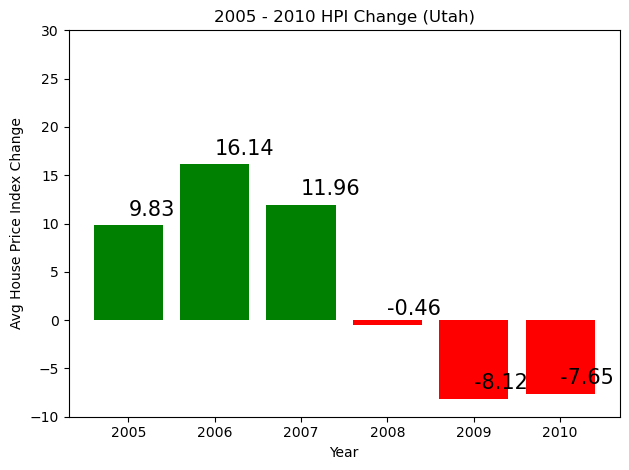

In [7]:
the_year = df["Year"]
api = df["Avg House Price Index Change"].astype(float)
colors = ['g', 'g', 'g','r', 'r', 'r']
myplot = plt.bar(the_year, api, color=colors)
plt.ylim(top=30)
plt.ylim(bottom=-10)
plt.xlabel("Year")
plt.title("2005 - 2010 HPI Change (Utah)")
plt.ylabel("Avg House Price Index Change")
api.info()
apii = round(api, 2)
for index, data in enumerate(apii):
    plt.text(x=index, y=data+1, s=f"{data}", fontdict=dict(fontsize=15))
plt.tight_layout()

apii



In [8]:
#Alabama
cut_data_5 = data_5.loc[data_5["state_abbr"] == "AL"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstAL = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
ALdf = pd.DataFrame({ "Year": lstAL,
"Avg House Price Index Change" : lstAL})
ALapi = ALdf["Avg House Price Index Change"]
ALdf



C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\1171147041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,6.894622,6.894622
1,7.971242,7.971242
2,4.352386,4.352386
3,1.043394,1.043394
4,-1.804587,-1.804587
5,-4.183758,-4.183758


In [9]:
#Alaska
cut_data_5 = data_5.loc[data_5["state_abbr"] == "AK"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstAK = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
AKdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstAK})
AKapi = AKdf["Avg House Price Index Change"]

AKdf



C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\1515396430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,12.065818
1,2006,10.413486
2,2007,3.690183
3,2008,-0.194464
4,2009,-1.144554
5,2010,-0.311062


In [10]:
#ARIZONA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "AZ"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstAZ = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
AZdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstAZ})
AZapi = AZdf["Avg House Price Index Change"]
AZdf

C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2742221981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,30.570599
1,2006,19.048150
2,2007,-0.507309
3,2008,-12.029372
4,2009,-21.356396
5,2010,-11.945700


In [11]:
#ARKANSAS
cut_data_5 = data_5.loc[data_5["state_abbr"] == "AR"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstAR = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
ARdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstAR})
ARapi = ARdf["Avg House Price Index Change"]
ARdf

C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\4044104797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,6.641089
1,2006,6.204023
2,2007,2.969555
3,2008,0.115441
4,2009,-1.708012
5,2010,-2.322668


In [12]:
#CALIFORNIA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "CA"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstCA = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
CAdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstCA})
CAapi = CAdf["Avg House Price Index Change"]
CAdf

C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2551381821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,25.078915
1,2006,11.102761
2,2007,-3.050105
3,2008,-18.594796
4,2009,-18.376266
5,2010,-1.240461


In [13]:
#COLORADO
cut_data_5 = data_5.loc[data_5["state_abbr"] == "CO"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstCO = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
COdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstCO})
COapi = COdf["Avg House Price Index Change"]
COdf

C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3551077906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,5.205085
1,2006,3.379854
2,2007,0.580380
3,2008,-2.822345
4,2009,-1.354746
5,2010,-2.549820


In [14]:
#CENNECTICUT
cut_data_5 = data_5.loc[data_5["state_abbr"] == "CT"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstCT = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
CTdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstCT})
CTapi = CTdf["Avg House Price Index Change"]
CTdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2372913284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,13.021816
1,2006,6.273324
2,2007,0.324993
3,2008,-3.630166
4,2009,-7.158382
5,2010,-3.863880


In [15]:
#DELAWARE
cut_data_5 = data_5.loc[data_5["state_abbr"] == "DE"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstDE = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
DEdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstDE})
DEapi = DEdf["Avg House Price Index Change"]
DEdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3143328601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,16.569598
1,2006,9.060622
2,2007,2.420354
3,2008,-2.475584
4,2009,-6.209605
5,2010,-4.830575


In [16]:
#FLORIDA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "FL"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstFL = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
FLdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstFL})
FLapi = FLdf["Avg House Price Index Change"]
FLdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\331885693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,26.186317
1,2006,17.301546
2,2007,-2.182110
3,2008,-14.189818
4,2009,-18.348516
5,2010,-9.375166


In [17]:
#GEORGIA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "GA"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstGA = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
GAdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstGA})
GAapi = GAdf["Avg House Price Index Change"]
GAdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\318964688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,5.844214
1,2006,4.624289
2,2007,2.571777
3,2008,-2.784777
4,2009,-5.630619
5,2010,-7.777282


In [18]:
#HAWAII
cut_data_5 = data_5.loc[data_5["state_abbr"] == "HI"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstHI = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
HIdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstHI})
HIapi = HIdf["Avg House Price Index Change"]
HIdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\4173999574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,25.698629
1,2006,14.963462
2,2007,1.668136
3,2008,-2.417992
4,2009,-8.758200
5,2010,-4.676523


In [19]:
#IDAHO
cut_data_5 = data_5.loc[data_5["state_abbr"] == "ID"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstID = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
IDdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstID})
IDapi = IDdf["Avg House Price Index Change"]
IDdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2299831459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,15.287277
1,2006,18.210939
2,2007,6.298737
3,2008,-2.268571
4,2009,-8.341888
5,2010,-11.695564


In [20]:
#ILLINOIS
cut_data_5 = data_5.loc[data_5["state_abbr"] == "IL"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstIL = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
ILdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstIL})
ILapi = ILdf["Avg House Price Index Change"]
ILdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2687823853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,8.675513
1,2006,6.237701
2,2007,1.722201
3,2008,-2.786388
4,2009,-7.292953
5,2010,-5.905279


In [21]:
#INDIANA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "IN"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstIN = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
INdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstIN})
INapi = INdf["Avg House Price Index Change"]
INdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3226073233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,3.219630
1,2006,1.652977
2,2007,0.869705
3,2008,-0.876211
4,2009,-1.798718
5,2010,-2.148715


In [22]:
#IOWA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "IA"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstIA = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
IAdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstIA})
IAapi = IAdf["Avg House Price Index Change"]
IAdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\1655200770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,4.806217
1,2006,3.460924
2,2007,2.083041
3,2008,0.582648
4,2009,-0.268512
5,2010,-0.934378


In [23]:
#KANSAS
cut_data_5 = data_5.loc[data_5["state_abbr"] == "KS"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstKS = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
KSdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstKS})
KSapi = KSdf["Avg House Price Index Change"]
KSdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2332533873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,4.381343
1,2006,3.801115
2,2007,2.504401
3,2008,-0.035234
4,2009,-0.579440
5,2010,-1.054633


In [24]:
#KENTUCKY
cut_data_5 = data_5.loc[data_5["state_abbr"] == "KY"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstKY = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
KYdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstKY})
KYapi = KYdf["Avg House Price Index Change"]
KYdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2759286889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,5.249545
1,2006,3.687186
2,2007,2.569623
3,2008,0.228846
4,2009,-1.199664
5,2010,-1.192053


In [25]:
#LOUISIANA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "LA"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstLA = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
LAdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstLA})
LAapi = LAdf["Avg House Price Index Change"]
LAdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\1195811741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,6.645096
1,2006,10.264369
2,2007,5.429063
3,2008,0.902756
4,2009,-0.635337
5,2010,-1.201246


In [26]:
#MAINE
cut_data_5 = data_5.loc[data_5["state_abbr"] == "ME"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstME = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
MEdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstME})
MEapi = MEdf["Avg House Price Index Change"]
MEdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\4102511955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,11.671860
1,2006,4.822448
2,2007,1.346609
3,2008,-0.888754
4,2009,-5.224118
5,2010,-3.496469


In [27]:
#MARYLAND
cut_data_5 = data_5.loc[data_5["state_abbr"] == "MD"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstMD = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
MDdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstMD})
MDapi = MDdf["Avg House Price Index Change"]
MDdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2435118303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,22.345604
1,2006,12.800694
2,2007,1.940789
3,2008,-4.864062
4,2009,-10.518422
5,2010,-6.352932


In [28]:
#MASSACHUSETTS
cut_data_5 = data_5.loc[data_5["state_abbr"] == "MA"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstMA = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
MAdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstMA})
MAapi = MAdf["Avg House Price Index Change"]
MAdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2725698716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,10.167922
1,2006,1.454838
2,2007,-3.053233
3,2008,-5.029008
4,2009,-5.772143
5,2010,-1.695522


In [29]:
#MICHIGAN
cut_data_5 = data_5.loc[data_5["state_abbr"] == "MI"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstMI = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
MIdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstMI})
MIapi = CTdf["Avg House Price Index Change"]
MIdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\515131997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,3.750659
1,2006,-0.733080
2,2007,-4.419290
3,2008,-8.388705
4,2009,-9.419092
5,2010,-6.776229


In [30]:
#MINNESOTA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "MN"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstMN = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
MNdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstMN})
MNapi = MNdf["Avg House Price Index Change"]
MNdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3341943814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,8.290113
1,2006,3.398846
2,2007,-0.126188
3,2008,-4.655935
4,2009,-6.058514
5,2010,-4.928310


In [31]:
#MISSISSIPPI
cut_data_5 = data_5.loc[data_5["state_abbr"] == "MS"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstMS = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
MSdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstMS})
MSapi = MSdf["Avg House Price Index Change"]
MSdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3958030912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,5.384232
1,2006,10.107553
2,2007,4.389226
3,2008,0.523719
4,2009,-2.442583
5,2010,-4.015962


In [32]:
#MISSOURI
cut_data_5 = data_5.loc[data_5["state_abbr"] == "MO"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstMO = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
MOdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstMO})
MOapi = MOdf["Avg House Price Index Change"]
MOdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\1720541235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,6.367375
1,2006,4.488535
2,2007,1.670557
3,2008,-1.523103
4,2009,-2.795546
5,2010,-3.307342


In [33]:
#MONTANA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "MT"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstMT = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
MTdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstMT})
MTapi = MTdf["Avg House Price Index Change"]
MTdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\426492292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,12.586473
1,2006,12.114733
2,2007,7.356776
3,2008,1.755847
4,2009,-2.294263
5,2010,-4.151899


In [34]:
#NEBRASKA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "NE"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstNE = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
NEdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstNE})
NEapi = NEdf["Avg House Price Index Change"]
NEdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3166360305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,4.838869
1,2006,2.612893
2,2007,1.516386
3,2008,-0.494989
4,2009,-0.282260
5,2010,-0.831109


In [35]:
#NEVADA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "NV"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstNV = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
NVdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstNV})
NVapi = NVdf["Avg House Price Index Change"]
NVdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3853365278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,25.665517
1,2006,9.764262
2,2007,-2.754561
3,2008,-18.221214
4,2009,-27.679785
5,2010,-12.079578


In [36]:
#NEW HAMPSHIRE
cut_data_5 = data_5.loc[data_5["state_abbr"] == "NH"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstNH = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
NHdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstNH})
NHapi = NHdf["Avg House Price Index Change"]
NHdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\174235608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,11.313723
1,2006,3.410772
2,2007,-1.096524
3,2008,-3.522788
4,2009,-6.973040
5,2010,-4.137386


In [37]:
#NEW JERSEY
cut_data_5 = data_5.loc[data_5["state_abbr"] == "NJ"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstNJ = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
NJdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstNJ})
NJapi = NJdf["Avg House Price Index Change"]
NJdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2463494333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,16.552138
1,2006,9.019663
2,2007,0.056240
3,2008,-4.075266
4,2009,-8.022168
5,2010,-3.978075


In [38]:
#NEW MEXICO
cut_data_5 = data_5.loc[data_5["state_abbr"] == "NM"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstNM = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
NMdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstNM})
NMapi = NMdf["Avg House Price Index Change"]
NMdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\1771026173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,11.816025
1,2006,12.860298
2,2007,6.433630
3,2008,-0.313808
4,2009,-4.371383
5,2010,-3.773210


In [39]:
#NEW YORK
cut_data_5 = data_5.loc[data_5["state_abbr"] == "NY"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstNY = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
NYdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstNY})
NYapi = NYdf["Avg House Price Index Change"]
NYdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3632019115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,13.770680
1,2006,7.169382
2,2007,1.650447
3,2008,-1.970319
4,2009,-4.569860
5,2010,-2.422088


In [40]:
#NORTH CAROLINA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "NC"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstNC = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
NCdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstNC})
NCapi = NCdf["Avg House Price Index Change"]
NCdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2808326438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,5.991514
1,2006,6.965581
2,2007,4.914701
3,2008,0.975571
4,2009,-2.399737
5,2010,-4.474297


In [41]:
#NORTH DAKOTA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "ND"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstND = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
NDdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstND})
NDapi = NDdf["Avg House Price Index Change"]
NDdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3813817733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,8.985299
1,2006,7.153333
2,2007,4.370294
3,2008,3.269489
4,2009,1.101606
5,2010,2.195036


In [42]:
#OHIO
cut_data_5 = data_5.loc[data_5["state_abbr"] == "OH"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstOH = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
OHdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstOH})
OHapi = OHdf["Avg House Price Index Change"]
OHdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\21264993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,3.255659
1,2006,0.782124
2,2007,-1.375733
3,2008,-2.930891
4,2009,-2.583046
5,2010,-3.341733


In [43]:
#OKLAHOMA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "OK"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstOK = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
OKdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstOK})
OKapi = OKdf["Avg House Price Index Change"]
OKdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2294600321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,5.147477
1,2006,4.493800
2,2007,3.991454
3,2008,1.585327
4,2009,0.358307
5,2010,-0.201310


In [44]:
#OREGON
cut_data_5 = data_5.loc[data_5["state_abbr"] == "OR"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstOR = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
ORdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstOR})
ORapi = ORdf["Avg House Price Index Change"]
ORdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\686613864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,16.931098
1,2006,16.517591
2,2007,5.844839
3,2008,-2.660226
4,2009,-9.319203
5,2010,-8.371527


In [45]:
#PENNSYLVANIA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "PA"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstPA = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
PAdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstPA})
PAapi = PAdf["Avg House Price Index Change"]
PAdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\726316060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,10.728593
1,2006,7.615240
2,2007,2.902035
3,2008,-0.128561
4,2009,-2.502514
5,2010,-1.942700


In [46]:
#RHODE ISLAND
cut_data_5 = data_5.loc[data_5["state_abbr"] == "RI"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstRI = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
RIdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstRI})
RIapi = RIdf["Avg House Price Index Change"]
RIdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\445430824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,14.474406
1,2006,4.165495
2,2007,-2.099500
3,2008,-7.902250
4,2009,-10.058450
5,2010,-3.974798


In [47]:
#SOUTH CAROLINA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "SC"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstSC = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
SCdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstSC})
SCapi = CTdf["Avg House Price Index Change"]
SCdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3680025004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,7.489079
1,2006,7.353742
2,2007,4.584431
3,2008,0.471757
4,2009,-2.906060
5,2010,-4.918642


In [48]:
#SOUTH DAKOTA 
cut_data_5 = data_5.loc[data_5["state_abbr"] == "SD"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstSD = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
SDdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstSD})
SDapi = SDdf["Avg House Price Index Change"]
SDdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\1319725155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,7.617803
1,2006,5.637209
2,2007,3.761908
3,2008,2.604451
4,2009,0.278779
5,2010,-1.130682


In [49]:
#TENNESSEE
cut_data_5 = data_5.loc[data_5["state_abbr"] == "TN"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstTN = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
TNdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstTN})
TNapi = TNdf["Avg House Price Index Change"]
TNdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\315458494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,6.606447
1,2006,7.043756
2,2007,4.356690
3,2008,0.106515
4,2009,-2.017127
5,2010,-2.879115


In [50]:
#TEXAS
cut_data_5 = data_5.loc[data_5["state_abbr"] == "TX"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstTX = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
TXdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstTX})
TXapi = TXdf["Avg House Price Index Change"]
TXdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2749513784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,4.637678
1,2006,5.685473
2,2007,4.536946
3,2008,1.064747
4,2009,-0.016659
5,2010,-0.872162


In [51]:
#VERMONT
cut_data_5 = data_5.loc[data_5["state_abbr"] == "VT"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstVT = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
VTdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstVT})
VTapi = VTdf["Avg House Price Index Change"]
VTdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\1923535925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,14.596080
1,2006,7.904091
2,2007,2.556420
3,2008,-0.135909
4,2009,-2.630511
5,2010,-1.987111


In [52]:
#VIRGINIA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "VA"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstVA = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
VAdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstVA})
VAapi = VAdf["Avg House Price Index Change"]
VAdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\2696914392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,20.011903
1,2006,10.931314
2,2007,1.179661
3,2008,-4.552146
4,2009,-6.220293
5,2010,-3.006938


In [53]:
#WASHINGTON
cut_data_5 = data_5.loc[data_5["state_abbr"] == "WA"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstWA = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
WAdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstWA})
WAapi = WAdf["Avg House Price Index Change"]
WAdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\970263447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,16.142309
1,2006,15.629870
2,2007,6.971708
3,2008,-1.576025
4,2009,-8.614320
5,2010,-7.127694


In [54]:
#WEST VIRGINIA
cut_data_5 = data_5.loc[data_5["state_abbr"] == "WV"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstWV = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
WVdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstWV})
WVapi = WVdf["Avg House Price Index Change"]
WVdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3510264447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,9.053482
1,2006,5.621762
2,2007,2.470573
3,2008,-0.763930
4,2009,-2.806853
5,2010,-2.314077


In [55]:
#WISCONSIN
cut_data_5 = data_5.loc[data_5["state_abbr"] == "WI"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstWI = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
WIdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstWI})
WIapi = WIdf["Avg House Price Index Change"]
WIdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\3224156170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,8.238479
1,2006,3.744713
2,2007,1.285671
3,2008,-1.010509
4,2009,-3.632931
5,2010,-3.927891


In [56]:
#WYOMING
cut_data_5 = data_5.loc[data_5["state_abbr"] == "WY"]
cut_data_5[['year']] = cut_data_5[["year"]].astype(str)
working_data = cut_data_5.loc[(cut_data_5['year'] >= '2005') & (cut_data_5['year'] <'2011')]
#Make dataframe for year 2005
data05 = working_data.loc[(working_data['year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["annual_change"].mean()

#Make dataframe for year 2006
data05 = working_data.loc[(working_data['year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["annual_change"].mean()

#Make dataframe for year 2007
data07 = working_data.loc[(working_data['year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["annual_change"].mean()

#Make dataframe for year 2008
data08 = working_data.loc[(working_data['year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["annual_change"].mean()

#Make dataframe for year 2009
data09 = working_data.loc[(working_data['year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["annual_change"].mean()

#Make dataframe for year 2010
data10 = working_data.loc[(working_data['year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["annual_change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstWY = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
WYdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstWY})
WYapi = WYdf["Avg House Price Index Change"]
WYdf


C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34476\1973996835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data_5[['year']] = cut_data_5[["year"]].astype(str)


,Year,Avg House Price Index Change
0,2005,11.813028
1,2006,13.053592
2,2007,9.517958
3,2008,2.809225
4,2009,-2.625141
5,2010,-3.536901


In [57]:
one = pd.merge(WYdf, WIdf, how='outer')
two= pd.merge(SDdf, COdf, how='outer')
three = pd.merge(CTdf, DEdf, how='outer')
five = pd.merge(GAdf, TNdf, how='outer')
six = pd.merge(HIdf, IDdf, how='outer')
seven  = pd.merge(ILdf, INdf, how='outer')
eight = pd.merge(IAdf, KSdf, how='outer')
nine = pd.merge(KYdf, LAdf, how='outer')
ten = pd.merge(MEdf, MDdf, how='outer')
eleven = pd.merge(MAdf, MIdf, how='outer')
twelve = pd.merge(MNdf, MSdf, how='outer')
thirteen = pd.merge(MOdf, MTdf, how='outer')
fourteen = pd.merge(NEdf, NVdf, how='outer')
fifteen = pd.merge(NHdf, NJdf, how='outer')
sixteen = pd.merge(NMdf, NYdf, how='outer')
seventeen = pd.merge(NCdf, NDdf, how='outer')
eighteen = pd.merge(TXdf, OHdf, how='outer')
nineteen = pd.merge(OKdf, ORdf, how='outer')
twenty = pd.merge(PAdf, VTdf, how='outer')
twenty_one = pd.merge(RIdf, SCdf, how='outer')
twenty_two = pd.merge(VAdf, WAdf, how='outer')
twenty_three= pd.merge(WVdf, df, how='outer')
merge1 = pd.merge(one, two, how='outer')
merge2 =pd.merge(three, five, how='outer')
merge3 =pd.merge(six, seven, how='outer')
merge4 =pd.merge(eight, nine, how='outer')
merge5 =pd.merge(ten, eleven, how='outer')
merge6 =pd.merge(twelve, thirteen, how='outer')
merge7 =pd.merge(fourteen, fifteen, how='outer')
merge8 =pd.merge(sixteen, seventeen, how='outer')
merge9 =pd.merge(eighteen, nineteen, how='outer')
merge10 =pd.merge(twenty, twenty_one, how='outer')
merge11 =pd.merge(twenty_two, twenty_three, how='outer')
closer1 = pd.merge(merge1, merge2, how='outer')
closer2 = pd.merge(merge3, merge4, how='outer')
closer3 = pd.merge(merge5, merge6, how='outer')
closer4 = pd.merge(merge7, merge8, how='outer')
closer5 = pd.merge(merge9, merge10, how='outer')
close1 = pd.merge(closer5, merge11, how='outer')
close2 = pd.merge(closer1, closer2, how='outer')
close3 = pd.merge(closer3, closer4, how='outer')
at1 = pd.merge(close1,close2, how='outer')
final = pd.merge(at1,close3, how='outer')
final

,Year,Avg House Price Index Change
0,2005,4.637678
1,2006,5.685473
2,2007,4.536946
3,2008,1.064747
4,2009,-0.016659
...,...,...
259,2006,7.153333
260,2007,4.370294
261,2008,3.269489
262,2009,1.101606


<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: Avg House Price Index Change
Non-Null Count  Dtype  
--------------  -----  
6 non-null      float64
dtypes: float64(1)
memory usage: 180.0 bytes


0    10.47
1     7.39
2     2.63
3    -1.80
4    -4.78
5    -3.85
Name: Avg House Price Index Change, dtype: float64

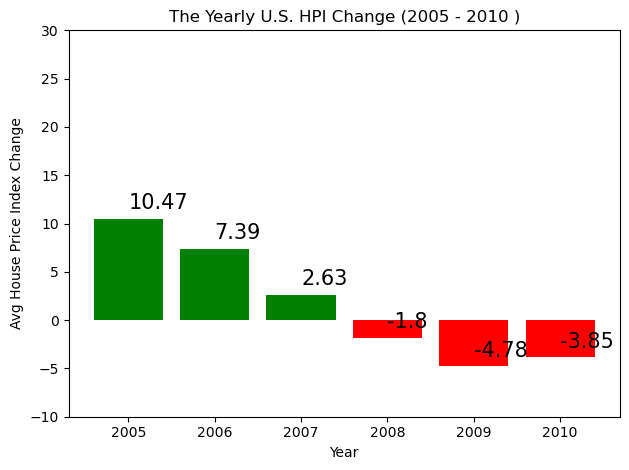

In [58]:
#National

#Make dataframe for year 2005
data05 = final.loc[(final['Year']== "2005")]
#housetrac05 = data05["tract"]
hpi05 = data05["Avg House Price Index Change"].mean()

#Make dataframe for year 2006
data05 = final.loc[(final['Year']== "2006")]
#housetrac05 = data05["tract"]
hpi06 = data05["Avg House Price Index Change"].mean()

#Make dataframe for year 2007
data07 = final.loc[(final['Year']== "2007")]
#housetrac05 = data05["tract"]
hpi07 = data07["Avg House Price Index Change"].mean()

#Make dataframe for year 2008
data08 = final.loc[(final['Year']== "2008")]
#housetrac05 = data05["tract"]
hpi08 = data08["Avg House Price Index Change"].mean()

#Make dataframe for year 2009
data09 = final.loc[(final['Year']== "2009")]
#housetrac05 = data05["tract"]
hpi09 = data09["Avg House Price Index Change"].mean()

#Make dataframe for year 2010
data10 = final.loc[(final['Year']== "2010")]
#housetrac05 = data05["tract"]
hpi10 = data10["Avg House Price Index Change"].mean()

lst = ['2005', '2006', '2007', '2008', '2009', '2010']
lstNAT = [hpi05, hpi06, hpi07, hpi08, hpi09, hpi10]
NATdf = pd.DataFrame({ "Year": lst,
"Avg House Price Index Change" : lstNAT})
NATapi = NATdf["Avg House Price Index Change"]

the_year = df["Year"]
NATapi = NATdf["Avg House Price Index Change"].astype(float)
colors = ['g', 'g', 'g','r', 'r', 'r']
myplot = plt.bar(the_year, NATapi, color=colors)
plt.ylim(top=30)
plt.ylim(bottom=-10)
plt.xlabel("Year")
plt.title("The Yearly U.S. HPI Change (2005 - 2010 )")
plt.ylabel("Avg House Price Index Change")
NATapi.info()
apii = round(NATapi, 2)
for index, data in enumerate(apii):
    plt.text(x=index, y=data+1, s=f"{data}", fontdict=dict(fontsize=15))
plt.tight_layout()

apii

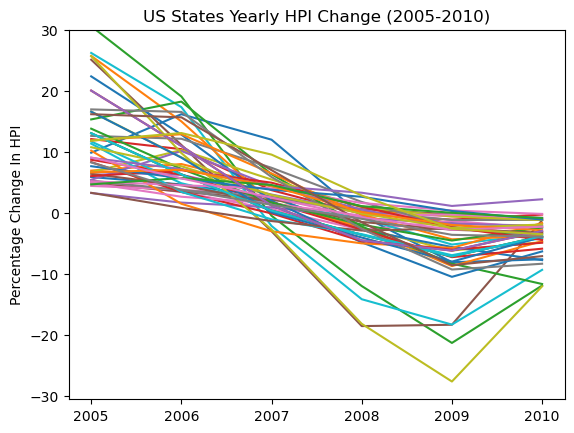

([<matplotlib.lines.Line2D at 0x1eddf3b3f50>],
 [<matplotlib.lines.Line2D at 0x1eddf48e210>])

In [60]:


from scipy import stats
ok = (plt.plot(the_year, api, label = "Utah"), plt.plot(the_year,ALapi, label="Alabama"),
    plt.plot(the_year,AZapi, label="Arizona"), plt.plot(the_year, AKapi, label="Alaska"),
    plt.plot(the_year, ARapi, label="Arkansas"), plt.plot(the_year,CAapi, label="California"),
    plt.plot(the_year, COapi, label="Colorado"), plt.plot(the_year, CTapi, label="Connecticut"),
    plt.plot(the_year, DEapi, label="Deleware"), plt.plot(the_year, FLapi, label="Florida"),
    plt.plot(the_year, GAapi, label="Georgia"),
    plt.plot(the_year, HIapi, label="Hawaii"), plt.plot(the_year, IDapi, label="Idaho"),
    plt.plot(the_year, ILapi, label="Illinois"), plt.plot(the_year, INapi, label="Indiana"),
    plt.plot(the_year, IAapi, label="Iowa"), plt.plot(the_year, KSapi, label= "Kansas"),
    plt.plot(the_year, KYapi, label="Kentucky"), plt.plot(the_year, LAapi, label="Louisiana"),
    plt.plot(the_year, MEapi, label="Maine"), plt.plot(the_year, MDapi, label="Maryland"),
    plt.plot(the_year, MAapi, label="Massachusetts"), plt.plot(the_year, MIapi, label="Michigan"),
    plt.plot(the_year, MNapi, label="Minnesota"), plt.plot(the_year, MSapi, label="Mississippi"),
    plt.plot(the_year, MOapi, label="Missouri"), plt.plot(the_year, NEapi, label="Nebraska"),
    plt.plot(the_year, MTapi, label="Montana"), plt.plot(the_year, NVapi, label="Nevada"),
    plt.plot(the_year, NHapi, label="New Hampshire"), plt.plot(the_year, NJapi, label="New Jersey"),
    plt.plot(the_year, NMapi, label="New Mexico"), plt.plot(the_year, NYapi, label="New York"),
    plt.plot(the_year, NCapi, label="North Carolina"), plt.plot(the_year, NDapi, label="North Dakota"),
    plt.plot(the_year, OHapi, label="Ohio"), plt.plot(the_year, OKapi, label="Okahoma"),
    plt.plot(the_year, ORapi, label="Oregon"), plt.plot(the_year, PAapi, label="Pennsylvania"),
    plt.plot(the_year, SCapi, label= "South Carolina"), plt.plot(the_year, SDapi, label="South Dakota"),
    plt.plot(the_year, TNapi, label="Tennessee"), plt.plot(the_year, TXapi, label="Texas"),
    plt.plot(the_year, VAapi, label= "Vermont"), plt.plot(the_year, VAapi, label="Virginia"),
    plt.plot(the_year, WAapi, label="Washington"), plt.plot(the_year, WVapi, label="West Virginia"),
    plt.plot(the_year, WIapi, label="Wisconsin"), plt.plot(the_year, WYapi, label="Wyoming"))
plt.ylim(top=30)
plt.title("US States Yearly HPI Change (2005-2010)")
plt.ylabel("Percentage Change In HPI")
plt.show()
ok
